# GENERATING UNIFORMLY DISTRIBUTED RANDOM NUMBERS AND TRANSFORMING THEM TO GAUSSIAN RANDOM VARIABLE

In [206]:
import numpy as np
import matplotlib.pyplot as plt

 TRANSFORMING THE GENERATED RANDOM NUMBERS TO GAUSSIAN BY "BOX-MULLER " TRANSFORM

In [207]:
def gaussian(r1,r2):
    z1 = np.sqrt(-2*np.log(r1))*np.cos(2*np.pi*r2)
    z2 = np.sqrt(-2*np.log(r1))*np.sin(2*np.pi*r2)
    return z1,z2

GENERATING UNIFORMLY DISTRIBUITED RANDOM NUMBERS BETWEEN (0,1)

In [208]:
rand_ = []
gaussian_ = []
for i in range(0,500):
    a = np.random.uniform(0,1)
    b = np.random.uniform(0,1)
    rand_.append(a)
    rand_.append(b)
    z3,z4 = gaussian(a,b)
    gaussian_.append(z3)
    gaussian_.append(z4)

PLOTTING THE UNIFORMLY GENERATED RANDOM NUMBERS

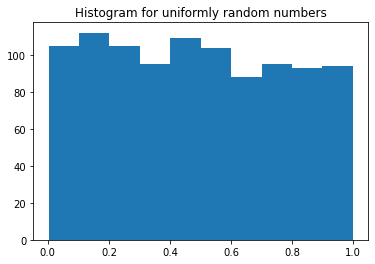

In [209]:
plt.hist(rand_)
p = plt.title("Histogram for uniformly random numbers")

Fitting a gaussian curve over a the generated histogram

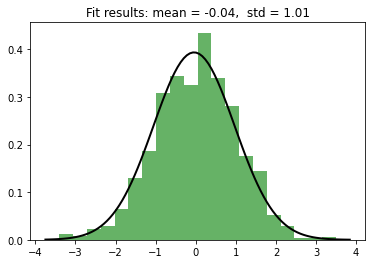

In [210]:
#fitting a gaussian curve
from scipy.stats import norm
mu, std = norm.fit(gaussian_)
plt.hist(z1,bins=20, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mean = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

# Verifying Central Limit theorem 

Calculating the mean for above generated random numbers 

In [211]:
parent_mean = np.mean(rand_)

In [212]:
parent_mean

0.4844067300821149

taking samples = 500,1000,10000

In [213]:
def plot(sample_mean,sample):
    mu1, std1 = norm.fit(sample_mean)
    plt.hist(sample_mean,bins=20, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu1, std1)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results for "+str(sample)+" samples: mean = %.4f,  std = %.4f" % (mu1, std1)
    plt.title(title)
    plt.show()

In [217]:
#samples = 500
samples = [100,500,1000,10000,100000]
sample_mean =[]
for i in samples:
    means = []
    for j in range(0,i):
        means.append(np.mean(np.random.uniform(0,1,1000)))
    sample_mean.append(means)

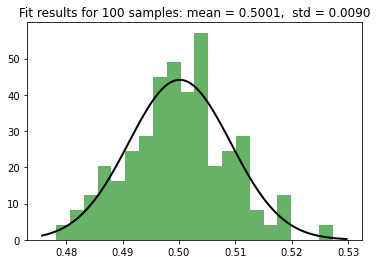

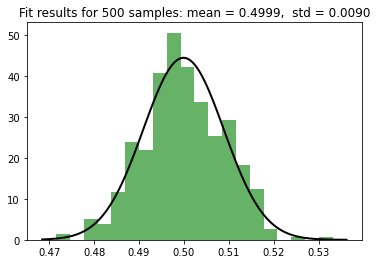

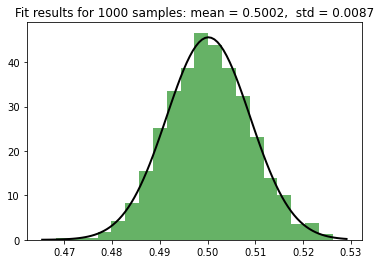

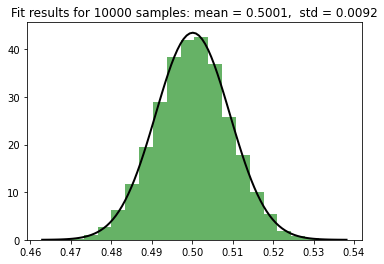

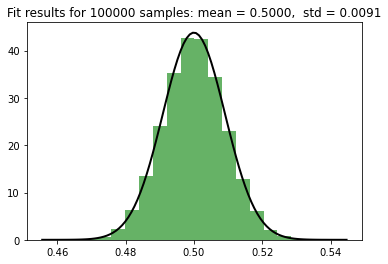

In [218]:
for i,j in zip(range(0,len(sample_mean)),samples):
    plot(sample_mean[i],j)

Error on different samples

In [219]:
for i,j in zip(range(0,len(sample_mean)),samples):
    error = np.abs(parent_mean - np.mean(sample_mean[i]))
    print("In "+str(j)+" samples: error = %.16f" % (error))

In 100 samples: error = 0.0157081090056699
In 500 samples: error = 0.0155180295659234
In 1000 samples: error = 0.0157615648112253
In 10000 samples: error = 0.0157414259306040
In 100000 samples: error = 0.0155618184164405
